<a href="https://colab.research.google.com/github/JacopoBarbiero1/Basics-of-Python/blob/main/BoP_session_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BASICS OF PYTHON | SESSION 5


We will check if:
Danceability tracks are liked more (higher danceability value, higher target value)

# 1.&nbsp;Data Importing

In [115]:
import pandas as pd #to work with dataframes
import numpy as np #to work with arrays
import scipy.stats as stats #to do statistical analysis
import matplotlib.pyplot as plt #to visualize data

data = pd.read_csv('data.csv')

# 2.&nbsp;Data Cleaning (overview)

In [116]:
#we check if there are null values in the database
print(data.info()) #we see no rows with null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [117]:
print(data.describe()) # description for numerical columns

        Unnamed: 0  acousticness  danceability   duration_ms       energy  \
count  2017.000000   2017.000000   2017.000000  2.017000e+03  2017.000000   
mean   1008.000000      0.187590      0.618422  2.463062e+05     0.681577   
std     582.402066      0.259989      0.161029  8.198181e+04     0.210273   
min       0.000000      0.000003      0.122000  1.604200e+04     0.014800   
25%     504.000000      0.009630      0.514000  2.000150e+05     0.563000   
50%    1008.000000      0.063300      0.631000  2.292610e+05     0.715000   
75%    1512.000000      0.265000      0.738000  2.703330e+05     0.846000   
max    2016.000000      0.995000      0.984000  1.004627e+06     0.998000   

       instrumentalness          key     liveness     loudness         mode  \
count       2017.000000  2017.000000  2017.000000  2017.000000  2017.000000   
mean           0.133286     5.342588     0.190844    -7.085624     0.612295   
std            0.273162     3.648240     0.155453     3.761684     0.

In [119]:
data1  = data.copy() #we create a copy that is going to be used for the analysis

# 5.&nbsp;Data Cleaning (noisy data)

In [120]:
#we exclude data we don't need, in this example we don't need tracks that are mostly speech (according to https://www.kaggle.com/code/alankarmahajan/exploring-spotify-dataset, we exclude tracks with speechiness higher than .66 )
data1 = data1[data1["speechiness"]<0.66]


In [121]:
print(data1.describe()) # description for numerical columns

        Unnamed: 0  acousticness  danceability   duration_ms       energy  \
count  2016.000000   2016.000000   2016.000000  2.016000e+03  2016.000000   
mean   1008.449405      0.187561      0.618468  2.462832e+05     0.681596   
std     582.196647      0.260050      0.161055  8.199562e+04     0.210323   
min       0.000000      0.000003      0.122000  1.604200e+04     0.014800   
25%     504.750000      0.009590      0.514000  2.000045e+05     0.563000   
50%    1008.500000      0.063050      0.631000  2.292040e+05     0.715500   
75%    1512.250000      0.265000      0.738000  2.699835e+05     0.846000   
max    2016.000000      0.995000      0.984000  1.004627e+06     0.998000   

       instrumentalness          key     liveness     loudness         mode  \
count       2016.000000  2016.000000  2016.000000  2016.000000  2016.000000   
mean           0.133352     5.342758     0.190886    -7.085729     0.612599   
std            0.273214     3.649138     0.155480     3.762615     0.

# 4.&nbsp;Data Cleaning (reduction)

In [122]:
data1 = data1.drop(["acousticness" , #we keep only the data we need for this analysis: danceability and target
                   "liveness" ,
                   "instrumentalness" ,
                   "key" ,
                   "duration_ms",
                   "energy",
                   "loudness" ,
                   "mode" , 
                   "speechiness" ,
                   "tempo" , 
                   "time_signature" ,
                   "valence" ,
                   "artist",
                   "song_title"], 1)
print(data1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2016 entries, 0 to 2016
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2016 non-null   int64  
 1   danceability  2016 non-null   float64
 2   target        2016 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 63.0 KB
None


<ipython-input-122-c4b52e88ffe0>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data1 = data1.drop(["acousticness" , #we keep only the data we need for this analysis: danceability and target


# 3.&nbsp;Data Cleaning (interpretability)

In [124]:
#we make the "target" a boolean because it can be only 0 and 1, and therefore it is not an integer
data1['target'] = data1["target"].astype(bool)

print(data1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2016 entries, 0 to 2016
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2016 non-null   int64  
 1   danceability  2016 non-null   float64
 2   target        2016 non-null   bool   
dtypes: bool(1), float64(1), int64(1)
memory usage: 49.2 KB
None


# 6.&nbsp;Data Cleaning (completeness)

In [ ]:
#there is no null value to handle

# 7.&nbsp;Data Exploring


In [112]:
# we see if the mean of danceability between liked and not liked songs is different (our hypothesis states that more danceable songs should be liked more)
data1.groupby("target")["danceability"].mean()
#liked songs tend to be more danceable than not liked songs. We will now check if this difference is significant

target
False    0.589648
True     0.646666
Name: danceability, dtype: float64

# 8.&nbsp;Data Analysis

In [126]:
#we can use the ttest with danceability values in liked and not liked songs
group1 = data1[(data1["target"]==True)]["danceability"]
group2 = data1[(data1["target"]==False)]["danceability"]
print(np.var(group1), np.var(group2)) #ratio is less than 4:1 variance in equal
stats.ttest_ind(group1, group2, equal_var=True)
#there is a significant difference (p value <.001)

0.026589819975904334 0.023604238142712994


Ttest_indResult(statistic=8.073034525629447, pvalue=1.1672939802095354e-15)

# 9.&nbsp;Data Visualization

Text(0.5, 1.0, 'DATASET')

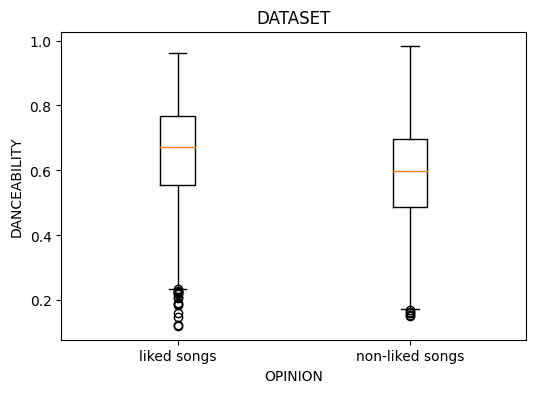

In [137]:
#we can plot a boxplot, with the danceability in liked songs and not liked songs

fig = plt.figure(figsize = (6, 4))

liked = data1[(data1["target"]==True)]["danceability"].to_numpy()
disliked = data1[(data1["target"]==False)]["danceability"].to_numpy()
plt.boxplot([liked, disliked], labels = ("liked songs", "non-liked songs"))

plt.xlabel("OPINION")
plt.ylabel("DANCEABILITY")
plt.title("DATASET", fontsize=12)

Text(0.5, 1.0, 'DATASET')

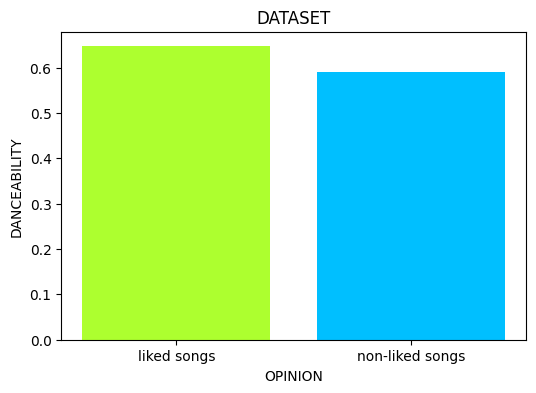

In [138]:
#we can also plot a bar chart
fig = plt.figure(figsize = (6, 4))

labels = ("liked songs","non-liked songs")
values = (np.mean(data1[data1["target"]==True]["danceability"]),np.mean(data1[data1["target"]==False]["danceability"]))
plt.bar(labels, values, color = ["greenyellow", "deepskyblue"])

plt.xlabel("OPINION")
plt.ylabel("DANCEABILITY")
plt.title("DATASET", fontsize=12)

# 10.&nbsp;Data Exporting